**Mounting colab notebook to Drive**

In [ ]:
# Mounting colab notebook to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Installing AI-Feynman and relevant packages*

In [ ]:
# Checking OS version, fortran compiler version, and granting relevant permissions (github only)
!sudo apt-get install csh
!lsb_release -a
!gfortran --version
!chmod +777 '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/'*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  csh
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 245 kB of archives.
After this operation, 358 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 csh amd64 20110502-7 [245 kB]
Fetched 245 kB in 0s (932 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package csh.
(Reading database ... 123598 files and directories currently installed.

In [ ]:
# Installing AI Feynman 2.0, c shell, and relevant packages
## https://ai-feynman.readthedocs.io/en/latest/
!pip install aifeynman --no-deps
!pip install sortedcontainers scikit-learn torch seaborn torchvision openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for aifeynman: filename=aifeynman-2.0.7-cp310-cp310-linux_x86_64.whl size=915210 sha256=a32500195938915d5488637374d91b6767c5cb1c5bb295e8fe11e0e1f963cd69
  Stored in directory: /root/.cache/pip/wheels/5d/f2/9b/73448a5c9458d5b02e08fc010b0e21ab88ed5cbd0e0aa91a99
Successfully built aifeynman
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using

In [ ]:
# Importing relevant modules
import os
import random
import numpy as np
import matplotlib as plt
import pandas as pd
import aifeynman
from aifeynman import S_brute_force, S_run_aifeynman

#Configuring plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

*Verifying working directory*

In [ ]:
input_path = '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/'
os.chdir(input_path)
!pwd

/content/drive/My Drive/Symbolic-Regressor/Feynman Local


*Function Deposit (run once)*

In [ ]:
# Function to generate Y-values for x_1, x_23
def getY(x_1,x_23):
  y = -0.5*x_1 + 0.5*x_23 + 3

  return y

# Function to generate noisy rows of data (WITH x-values included) for x_1, x_23 and irrelevant x-values
def getNoisyRow():
  x = [random.random() for x in range(4)]
  x[1] = x[0]
  x[3] = x[2]
  y = getY(x[1],x[3])
  mu = 0
  sigma = 0.05
  noise = np.random.normal(mu, sigma, 4)
  x = x+noise
  return str(x[0])+" "+str(x[1])+" "+str(x[2])+" "+str(x[3])+" "+str(y)+"\n"

*Perfect data - generation, plotting, brute force test, symbolic regression*

(10000, 3)
             0         1         2
0     0.548814  0.748268  3.099727
1     0.715189  0.180203  2.732507
2     0.602763  0.389023  2.893130
3     0.544883  0.037600  2.746358
4     0.423655  0.011788  2.794066
...        ...       ...       ...
9995  0.550447  0.748175  3.098864
9996  0.397151  0.298267  2.950558
9997  0.758430  0.446456  2.844013
9998  0.023787  0.360127  3.168170
9999  0.813575  0.625887  2.906156

[10000 rows x 3 columns]
/content/drive/My Drive/Symbolic-Regressor/Feynman Local
Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/Symbolic-Regressor/Feynman Local/feynman_data.txt


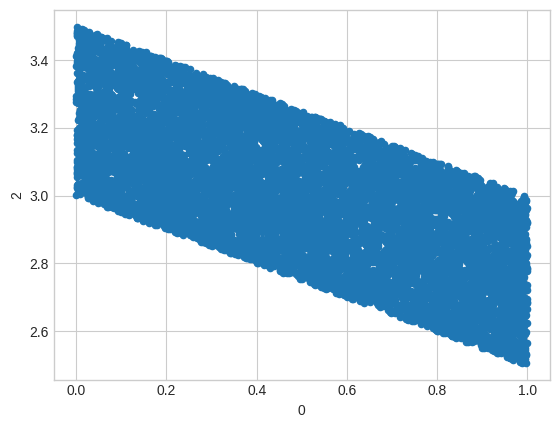

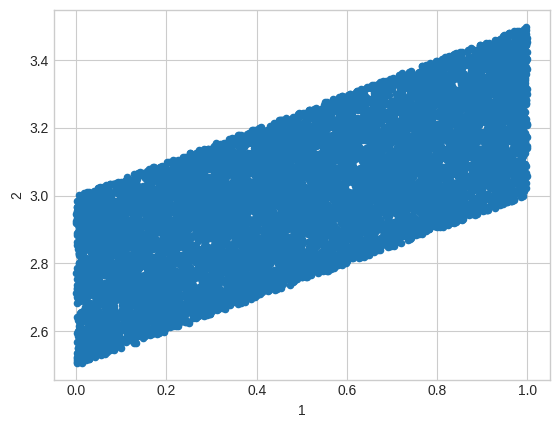

In [ ]:
# Generating perfect data (in a format readable by symbolic regression function)
#set seed?
np.random.seed(0)
x_1 = np.random.rand(10000)
x_23 = np.random.rand(10000)

#print(x_1)

y = getY(x_1,x_23)
#print(y.shape)

data = np.stack([x_1,x_23,y]).transpose()
print(data.shape)

# Saving data as a .txt file in working directory for use by symbolic regression function
np.save(input_path + 'feynman_data.npy',data)
np.savetxt(input_path + 'feynman_data.txt',data,delimiter=' ')
# Printing out generated data with Pandas and plotting it with matplotlib
df=pd.read_csv(input_path + 'feynman_data.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)
print(df)
#Running brute force test on perfect data
!pwd
S_brute_force.brute_force(input_path,"feynman_data.txt",30,"14ops.txt")


In [ ]:
degrees = [1, 2, 3]
epochs = [200, 400, 600, 800]
for degree in degrees:
    for num_epochs in epochs:
        print("Epochs:", num_epochs, "Degree", degree)
        # Printing out a few lines of data (purely for reference)
        !head -n 1 '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/feynman_data.txt'
        # Running symbolic regression function on generated dataset
        S_run_aifeynman.run_aifeynman(input_path,"feynman_data.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=epochs)

        # Viewing processed data
        !ls -1 '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/results'
        !cat '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/results/solution_feynman_data-finetuning.txt'

Plotting Result

In [ ]:
def get_soln(x0, x1):
  y = 3.000000000000+((x0-x1)/(np.cos(np.pi)-1))
  return y

(10000, 3)
             0         1         2
0     0.548814  0.748268  3.099727
1     0.715189  0.180203  2.732507
2     0.602763  0.389023  2.893130
3     0.544883  0.037600  2.746358
4     0.423655  0.011788  2.794066
...        ...       ...       ...
9995  0.550447  0.748175  3.098864
9996  0.397151  0.298267  2.950558
9997  0.758430  0.446456  2.844013
9998  0.023787  0.360127  3.168170
9999  0.813575  0.625887  2.906156

[10000 rows x 3 columns]


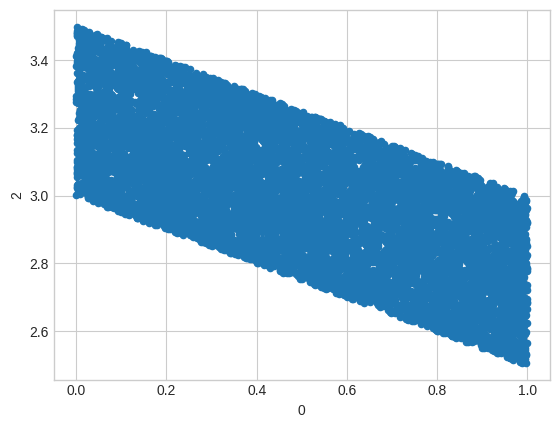

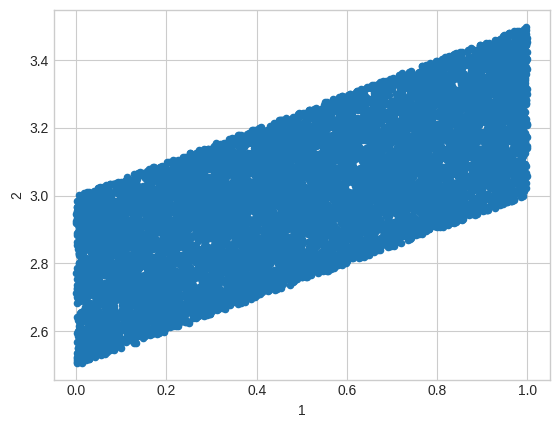

In [ ]:
# Generating perfect data (in a format readable by symbolic regression function)
#set seed?
np.random.seed(0)
x_1 = np.random.rand(10000)
x_23 = np.random.rand(10000)

#print(x_1)

y = get_soln(x_1,x_23)
#print(y.shape)

data = np.stack([x_1,x_23,y]).transpose()
print(data.shape)

# Saving data as a .txt file in working directory for use by symbolic regression function
np.save(input_path + 'feynman_data_testsoln.npy',data)
np.savetxt(input_path + 'feynman_data_testsoln.txt',data,delimiter=' ')
# Printing out generated data with Pandas and plotting it with matplotlib
df=pd.read_csv(input_path + 'feynman_data_testsoln.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=2)
df.plot.scatter(x=1, y=2)
print(df)


*Introducing noise (and unwanted variables) into the data - generation, plotting, brute force test, symbolic regression*

In [ ]:
# Generating NOISY data in a format readable by symbolic regression function
os.chdir(input_path)
print(os.getcwd())

with open("noisydata.txt", "w") as f:
  for _ in range(10000):
    f.write(getNoisyRow())
f.close()

!head -n 20 '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/noisydata.txt'

In [ ]:
# Printing out generated noisy data with Pandas and plotting it with matplotlib

!head -10 '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/noisydata.txt'
df=pd.read_csv(input_path + 'noisydata.txt',sep=" ",header=None)
df.plot.scatter(x=0, y=4)
df.plot.scatter(x=2, y=4)

In [ ]:
#Running brute force test on the noisy data
S_brute_force.brute_force(input_path,"noisydata.txt",30,"14ops.txt")

# Printing out a few lines of the noisy data (purely for reference)
!head -n 5 '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/noisydata.txt'

In [ ]:
# Running symbolic regression function on the noisy data
S_run_aifeynman.run_aifeynman(input_path,"noisydata.txt",30,"14ops.txt", polyfit_deg=3, NN_epochs=600)

# Viewing processed data
!ls -1 '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/results/'
!cat '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/results/solution_noisydata.txt'

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/Symbolic-Regressor/Feynman Local/noisydata.txt_train
Checking for brute force * 

Trying to solve mysteries with brute force...
Trying to solve /content/drive/My Drive/Symbolic-Regressor/Feynman Local/noisydata.txt_train
Checking polyfit 

Pareto frontier in the current branch:

Complexity #  MDL Loss #  Expression
45.64 26.82 -0.136676786151+pi
48.44 26.82 0.956494428967*pi
48.44 26.82 -0.956495132551*(-pi)
52.37 26.55 2.163067114678+cos(x0)
56.83 25.28 2.499637731389+(x3/(x3+x1))
61.5 25.01 2.612106569201+exp((x2-(x0+1)))
61.5 24.98 2.612792129173+exp((x3-(x0+1)))
64.7 24.24 2.999535280019+((x3-x0)/(pi-1))
71.92 24.24 1.696140405560*sqrt((x3+(pi-x0)))
75.09 24.22 2.999714205972+log(sqrt(exp((x3-x0))))

Checking for brute force + 

Trying to solve mysteries with brute force...
Trying to solve results/mystery_world_squared/noisydata.txt_train
Checking for brute force * 

T